# Analyze bag file
the input (json file) is produced with dumpBagFileInContainer.py

In [1]:
import json
import pandas as pd
import numpy as np
from sklearn import preprocessing


import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
df = pd.read_json('data/file.json')
df.topic.unique()

array(['/vehicle/steering_cmd:steering_wheel_angle_cmd',
       '/vehicle/brake_cmd:pedal_cmd', '/vehicle/throttle_cmd:pedal_cmd',
       '/current_velocity:twist.linear.x', '/twist_cmd:twist.linear.x',
       '/twist_cmd:twist.angular.z', '/vehicle/steering_report:speed',
       '/vehicle/steering_report:steering_wheel_angle_cmd',
       '/vehicle/brake_report:data', '/vehicle/throttle_report:data'], dtype=object)

In [4]:
# function to normalize thw values
def normalize_value(df,scale=1.0):
    result = df.copy()
    max_value = df['value'].max()
    min_value = df['value'].min()
    result['value'] = scale*(df['value'] - min_value) / (max_value - min_value)
    return result

In [5]:
data = pd.DataFrame()

In [6]:
# steering messages
steerang = df.loc[df['topic'] =='/vehicle/steering_cmd:steering_wheel_angle_cmd']
steerang = normalize_value(steerang)
twistz = df.loc[df['topic'] =='/twist_cmd:twist.angular.z']
twistz = normalize_value(twistz,-1.0)

steerwheel = df.loc[df['topic'] =='/vehicle/steering_report:steering_wheel_angle_cmd']
steerwheel = normalize_value(steerwheel)

plt.plot(steerang['t'],steerang['value'],label='steering_wheel_angle_cmd'')
plt.plot(twistz['t'],twistz['value'],label='twistz')
#plt.plot(steerwheel['t'],steerwheel['value'],label='steerwheel')
plt.legend(loc='best')
plt.show()

SyntaxError: EOL while scanning string literal (<ipython-input-6-edbe503d2678>, line 10)

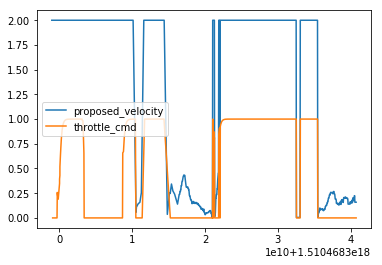

In [7]:
#speed messages

throttle_report = df.loc[df['topic'] =='/vehicle/throttle_report:data']
throttle_report = normalize_value(throttle_report)
proposed_velocity = df.loc[df['topic'] =='/twist_cmd:twist.linear.x']
proposed_velocity = normalize_value(proposed_velocity,2.0)
vehicle_speed = df.loc[df['topic'] =='/vehicle/steering_report:speed']
vehicle_speed = normalize_value(vehicle_speed)
throttle_cmd = df.loc[df['topic'] =='/vehicle/throttle_cmd:pedal_cmd']


#plt.plot(throttle_report['t'],throttle_report['value'],label='throttle_report')
plt.plot(proposed_velocity['t'],proposed_velocity['value'],label='proposed_velocity')
#plt.plot(vehicle_speed['t'],vehicle_speed['value'],label='vehicle_speed')
plt.plot(throttle_cmd['t'],throttle_cmd['value'],label='throttle_cmd')
plt.legend(loc='best')
plt.show()

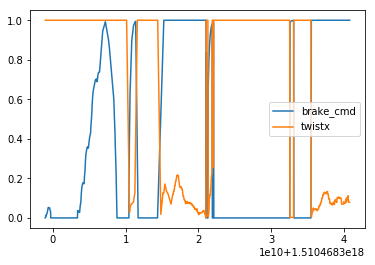

In [8]:
#brake messages

brake_cmd = df.loc[df['topic'] =='/vehicle/brake_cmd:pedal_cmd']
brake_cmd = normalize_value(brake_cmd)

twistx = df.loc[df['topic'] =='/twist_cmd:twist.linear.x']
twistx = normalize_value(twistx)

plt.plot(brake_cmd['t'],brake_cmd['value'],label='brake_cmd')
plt.plot(twistx['t'],twistx['value'],label='twistx')
#plt.plot(throttle_cmd['t'],throttle_cmd['value'],label='throttle_cmd')
plt.legend(loc='best')
plt.show()